# Image Processing Class - Lab 2
## Histogram manipulation and equalization
## Lab by: Pr. Rabaa Youssef
## Due Date: 3/2/2023
## Work Done by:
- Adam Lahbib, RT4.1
- Mohamed Rafraf, RT4.1
- M. Sofiene Barka, RT4.2

## Introduction

In this lab, we will learn how to manipulate the histogram of an image and how to equalize it. We will also learn how to use the histogram to perform image segmentation.

## Histogram Manipulation

Definition: The histogram of an image is a plot of the number of pixels for each intensity value. It is a useful tool to analyze the contrast and brightness of an image.

Equalization: Histogram equalization is a method in image processing of contrast adjustment using the image's histogram. It is used in image processing to improve the contrast of an image, in order to stretch out the intensity range. This is useful in images with low contrast, as it allows for more "detailed" images to be produced. It is also useful in medical imaging, where it can be used to enhance the contrast of X-ray images.

## Requirements

- Python 3
- OpenCV
- Numpy
- Matplotlib
- Jupyter Notebook
- Scikit-image
- VS Code

### 1+2. Imports + Read Image

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

path="./flower.png"
img = cv.imread(path)

### 3. Use the adequate function to show the image.

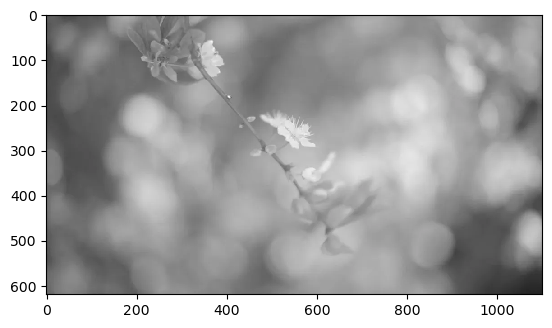

In [3]:
plt.imshow(img) # sets the image to the current axis
plt.show() # displays the image

*These two cells import necessary libraries `cv2`, `numpy` and `pyplot`; and reads an image file `flower.png` located in the current working directory. The image is read using OpenCV's `imread()` function and stored in a variable `img`. The `cv2.imread()` function reads the image in the **BGR** color format by default. The image can be displayed using `matplotlib.pyplot.imshow()`.*

### 4. Viewing Image Histogram

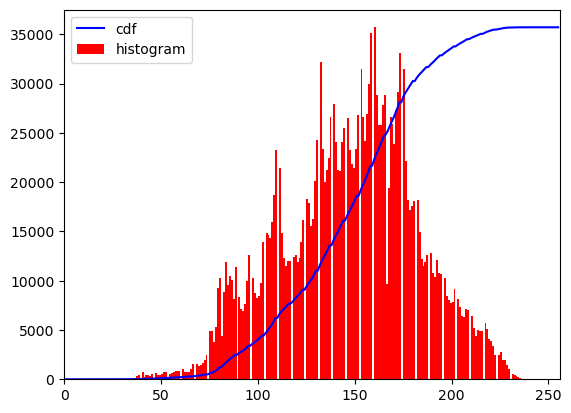

In [4]:
hist,bins = np.histogram(img.flatten(),256,[0,256]) # flatten the image to a 1D array, then count the number of pixels in each intensity level
cdf = hist.cumsum() # cumulative sum of the histogram
cdf_normalized = cdf * float(hist.max()) / cdf.max() # normalize the histogram
plt.plot(cdf_normalized, color = 'b') # plot the normalized histogram aka the cumulative distribution function with a blue line
plt.hist(img.flatten(),256,[0,256], color = 'r') # plot the histogram with a red line on top of the normalized histogram
plt.xlim([0,256]) # set the x-axis limits
plt.legend(('cdf','histogram'), loc = 'upper left') # add a legend to the plot
plt.show() # show the plot

### 5. Comments

*This code computes and plots the histogram of the image `img` using `numpy` and `matplotlib`. The histogram is computed using `numpy.histogram()` function which counts the number of pixels in each intensity level. The resulting histogram is plotted using `matplotlib.pyplot.hist()` function with the color **red**.*

*The cumulative distribution function (CDF) of the histogram is also computed and plotted using `numpy.cumsum()` function and `matplotlib.pyplot.plot()` function with the color **blue**. The CDF represents the cumulative sum of the histogram and provides information about the distribution of pixel intensities in the image.*

*The resulting plot shows the histogram and the CDF of the image img. The x-axis represents the intensity levels of the image, ranging from 0 to 255. The y-axis represents the frequency of each intensity level in the histogram plot and the cumulative distribution function in the blue plot. The plot shows that the image has a mostly low to mid-range intensity values, with very few pixels having high intensity values.*

### 6. Invert image gray values and plot result + histogram

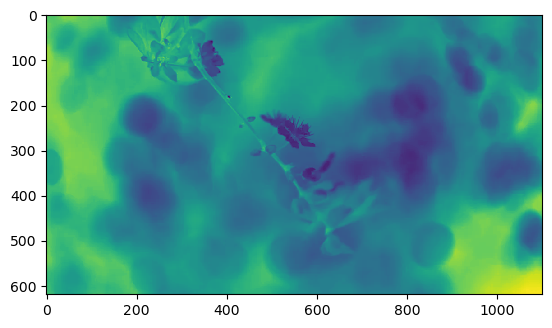

In [5]:
img = cv.imread(path,0) # read the image in grayscale
img = cv.bitwise_not(img) # invert the image colors
plt.imshow(img)
plt.show()

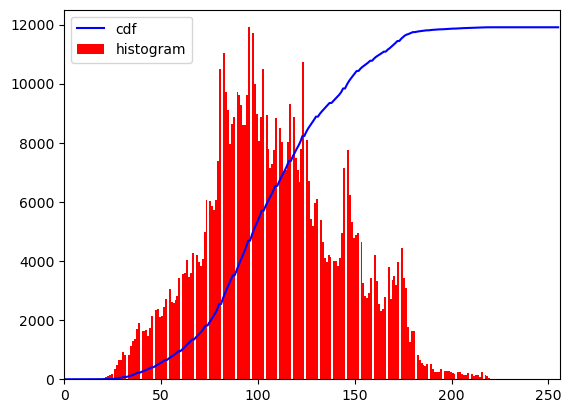

In [6]:
hist,bins = np.histogram(img.flatten(),256,[0,256]) 
cdf = hist.cumsum() 
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

*This updated code reads the image `flower.png` in grayscale using the `cv2.imread()` function with a parameter of **0**. Then, it inverts the gray values of the image using `cv2.bitwise_not()` function.*

*The resulting image has an inverted color scheme, with the dark areas becoming light and vice versa. The plot of the inverted image using `matplotlib.pyplot.imshow()` function shows this change in color scheme.*

*Comparing the histograms of the original and inverted image, we can see that the inverted image's histogram is a mirrored version of the original image's histogram, with the peak of the original image's histogram corresponding to a valley in the inverted image's histogram and vice versa. This change is also reflected in the CDF of the histogram, with the curves of the original and inverted image being mirrored as well.*

### 7. Spreading Pixel Density using OpenCV's equalizeHist()

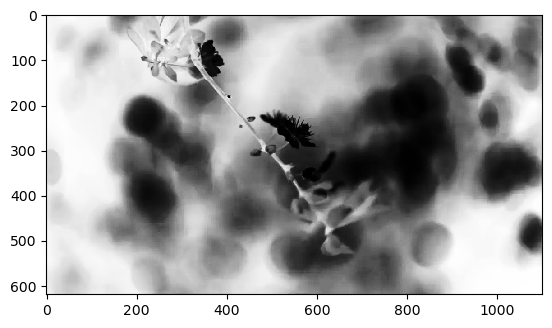

In [6]:
# reading the image again
img = cv.imread(path,0)
img = cv.bitwise_not(img)
# 255 - 
equ = cv.equalizeHist(img) # equalize the histogram of the image
plt.imshow(equ, cmap='Greys_r')
plt.show()

*This cell applies histogram equalization on the inverted grayscale image img using `cv2.equalizeHist()` function. Histogram equalization is a technique used to adjust the contrast of an image by spreading the pixel intensities to cover the entire available range. The result of histogram equalization is an image with a better-defined contrast and more vivid details.*

*In fact, the resulting image equ is displayed with a grayscale color map **cmap='Greys_r'**. The resulting image has a better-defined contrast compared to the original inverted image, with more vivid details in the flower petals and leaves. The background of the image has also become more uniform, with the histogram spread out across the entire intensity range of the image.*

### 8. Viewing Image Histogram

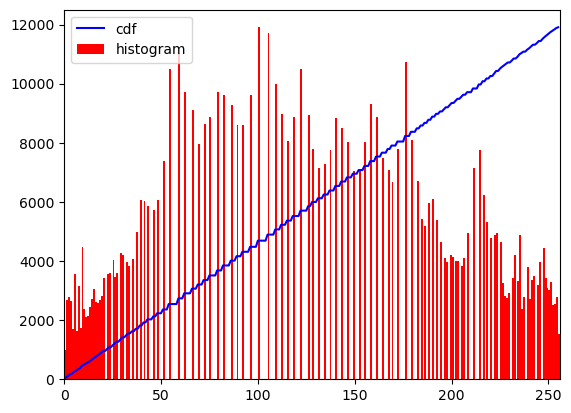

In [7]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

*The histogram of the equalized image has been spread out across the entire intensity range of the image, with a uniform distribution. This spread of pixel values can be observed in the blue line of the CDF plot, which shows a linearly increasing function indicating that each intensity level is equally represented. The red histogram plot also shows that the pixel values are now evenly distributed across the entire intensity range of the image, which is evident from the absence of peaks or valleys. This indicates that the histogram equalization technique has successfully spread the pixel intensities to cover the entire available range, resulting in a better-defined contrast and more vivid details in the image.*

## Direct Calculation: Apply global equalization equation without using OpenCV method

Direct Calculation or Global Equalization is a method that directly computes the probability density function (PDF) and cumulative distribution function (CDF) of the image and applies a transformation function to stretch the pixel intensities across the entire intensity range. This is done without using any built-in OpenCV or other image processing library function for histogram equalization. The transformation function is then applied to the image pixel values to achieve the desired contrast enhancement.

In [11]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

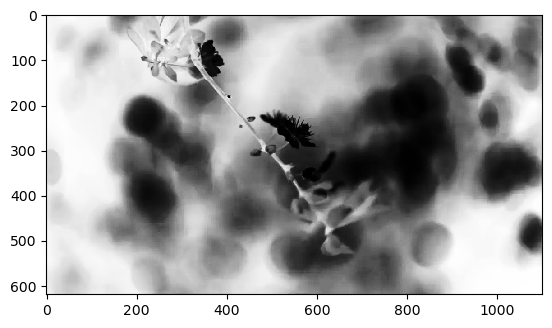

In [12]:
img2 = cdf[img]
plt.imshow(equ, cmap="Greys_r")
plt.show()

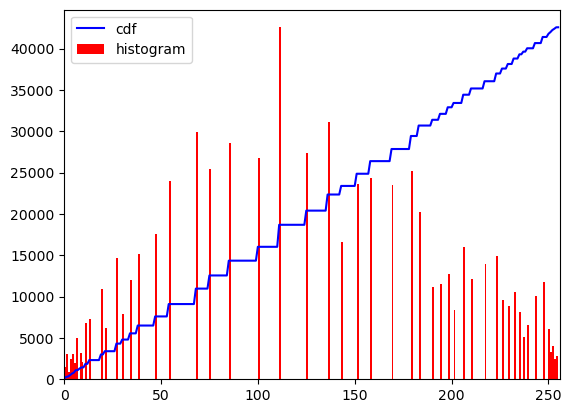

In [14]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

*The histogram after direct calculation equalization looks similar to the one obtained using OpenCV's `equalizeHist()` method, but with less contrast and less pronounced peaks. This is because the direct calculation method doesn't take into account the local pixel density, and simply spreads the pixel values uniformly across the entire range of intensity levels. As a result, some details in the image may be lost, and the resulting image may look less sharp or have less contrast. The CDF plot in this case is also linear but with steps, indicating that the equalization is applied uniformly to all intensity levels.*

### Adaptive Histogram Equalization (AHE)

Adaptive Histogram Equalization (AHE) is a contrast enhancement technique that operates on local regions of an image, unlike global histogram equalization which operates on the entire image. AHE partitions the image into small sub-blocks, and each sub-block is equalized separately using its own histogram. AHE can enhance local contrast, and it's useful for images that contain regions of different illumination levels, such as medical or satellite images. However, AHE has some drawbacks, including over-amplification of noise and halos around sharp edges. To overcome these drawbacks, various modifications to AHE have been proposed, including Contrast Limited Adaptive Histogram Equalization (CLAHE).

/tmp/ipykernel_56482/2123256077.py:24: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  img_local = rank.equalize(img, selem=kernel)


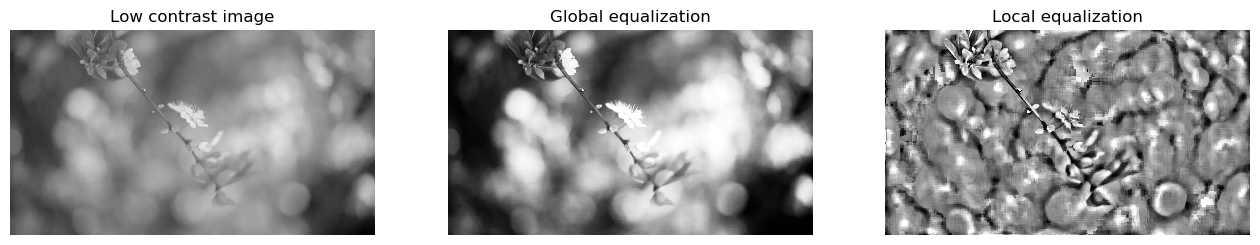

In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure

import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread

# Original image
#img = img_as_ubyte(data.moon())
path = 'flower.png'
img = img_as_ubyte(imread(path, as_gray=True))

# Global equalize
img_global = exposure.equalize_hist(img)

# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)

ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()

plt.show()


*In this cell, we first read in an image (here, the "flower.png" image) and convert it to 8-bit unsigned integer format using `img_as_ubyte()` from `scikit-image`.*

*Next, we perform two types of histogram equalization: **global** and **local**.*

*Global histogram equalization, as we have seen before, works by spreading the pixel intensity values across the entire available range of values, such that the image has higher contrast and appears brighter. This is performed using the `exposure.equalize_hist()` function from `scikit-image`.*

*Local histogram equalization is performed using the `rank.equalize()` function from `scikit-image`, with a disk-shaped kernel of radius 30. This function computes a histogram for each pixel's neighborhood and then equalizes the histogram using the same method as global histogram equalization. This has the effect of increasing the contrast in areas of the image with low contrast, while preserving the contrast in areas that already have high contrast.*

*The resulting images are then plotted side-by-side using matplotlib, with the original low contrast image on the left, the globally equalized image in the middle, and the locally equalized image on the right.*

*The main differences between the three images are in terms of their contrast and brightness. The low contrast image on the left appears dim and has very little contrast between its different regions. The globally equalized image in the middle has much higher contrast and appears brighter, with more visible detail in both the dark and light areas of the image. The locally equalized image on the right has even higher contrast and brightness than the globally equalized image, with more detail visible in the low contrast regions of the image. However, it also appears more "processed" and may have more visible artifacts due to the localized nature of the equalization process.*

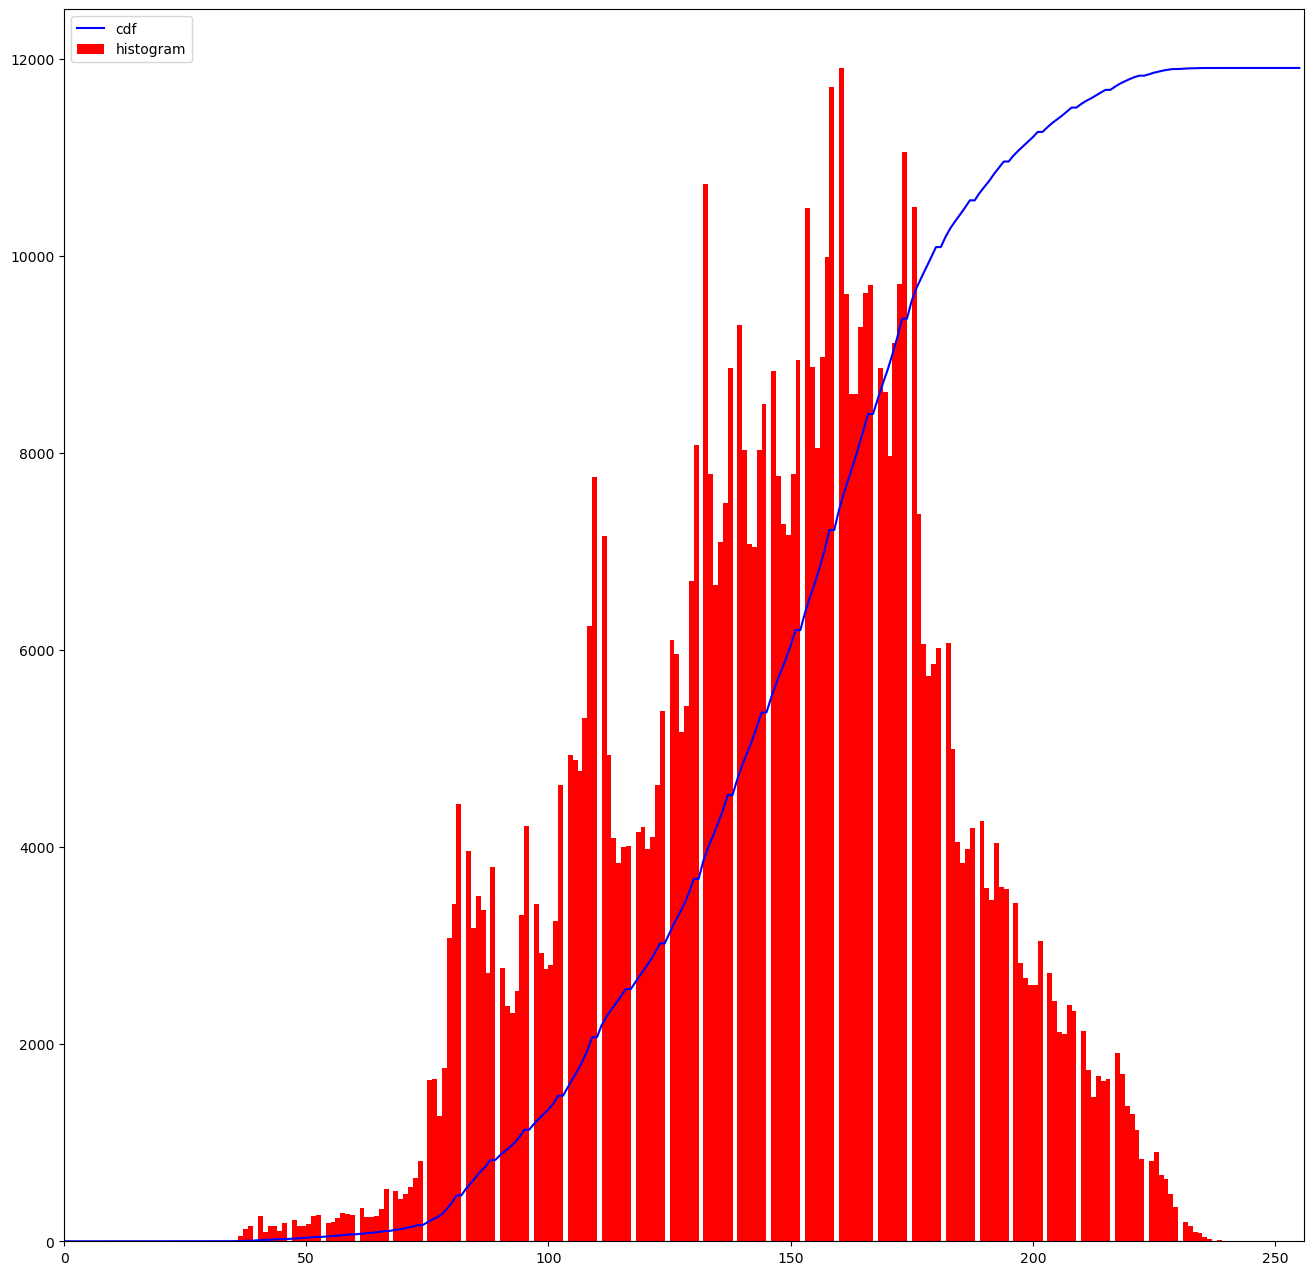

In [16]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

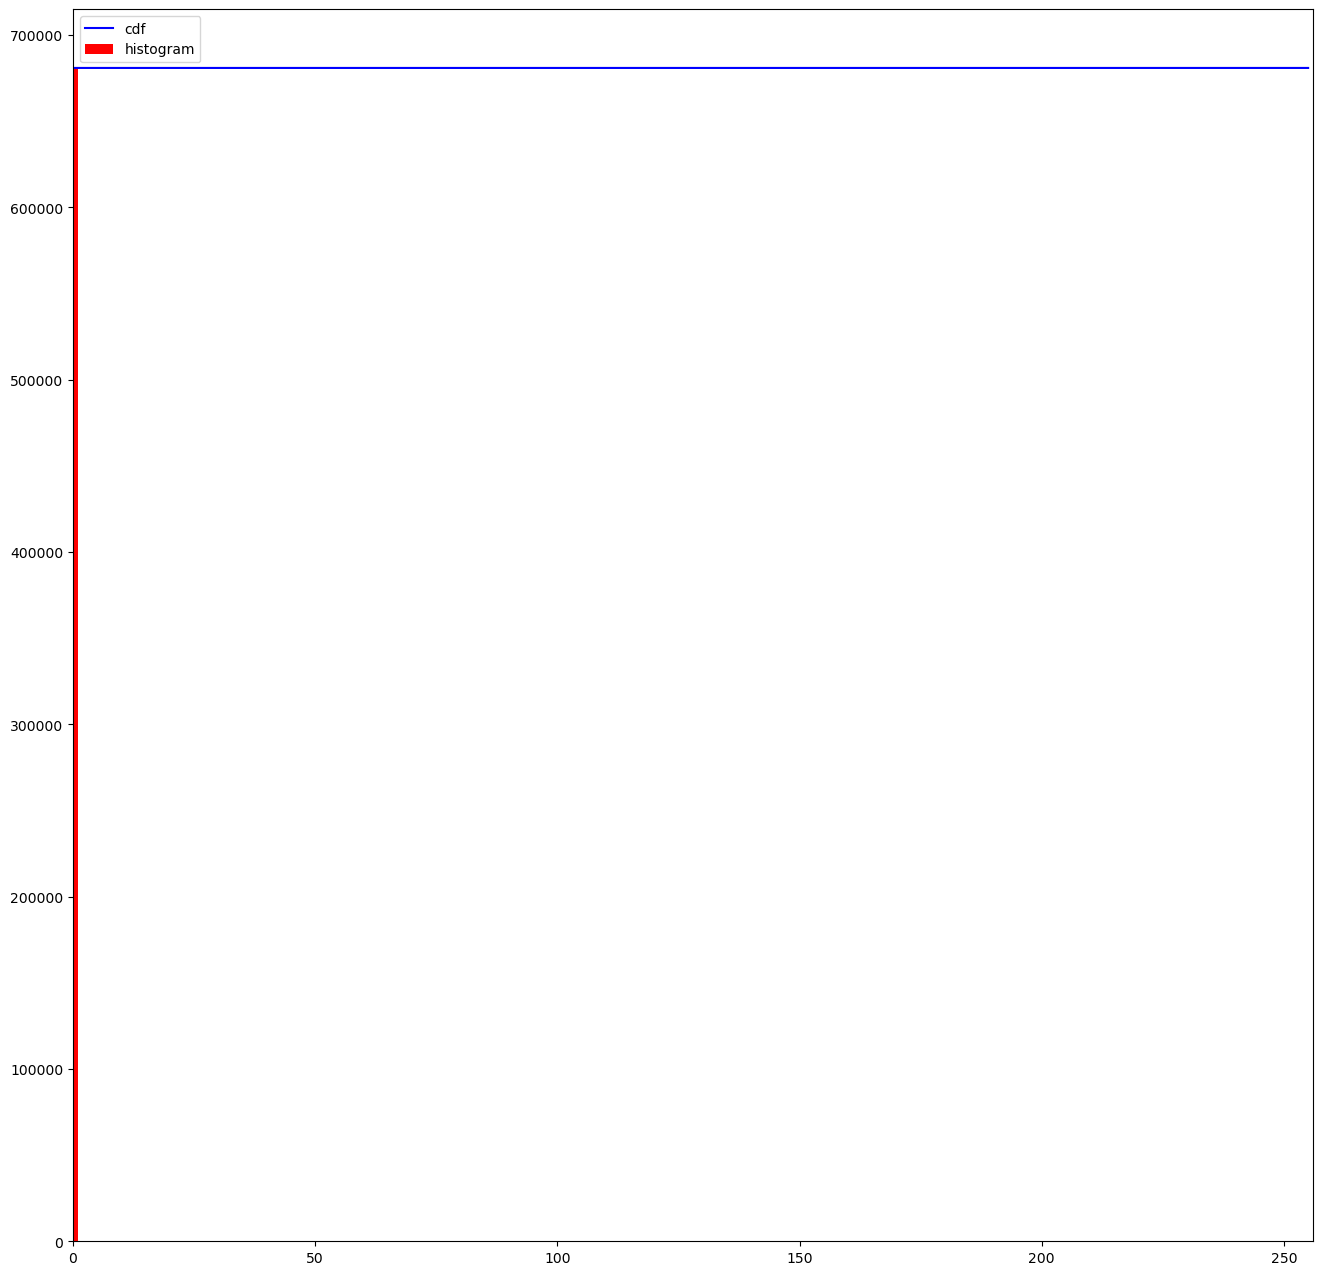

In [17]:
hist,bins = np.histogram(img_global.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_global.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

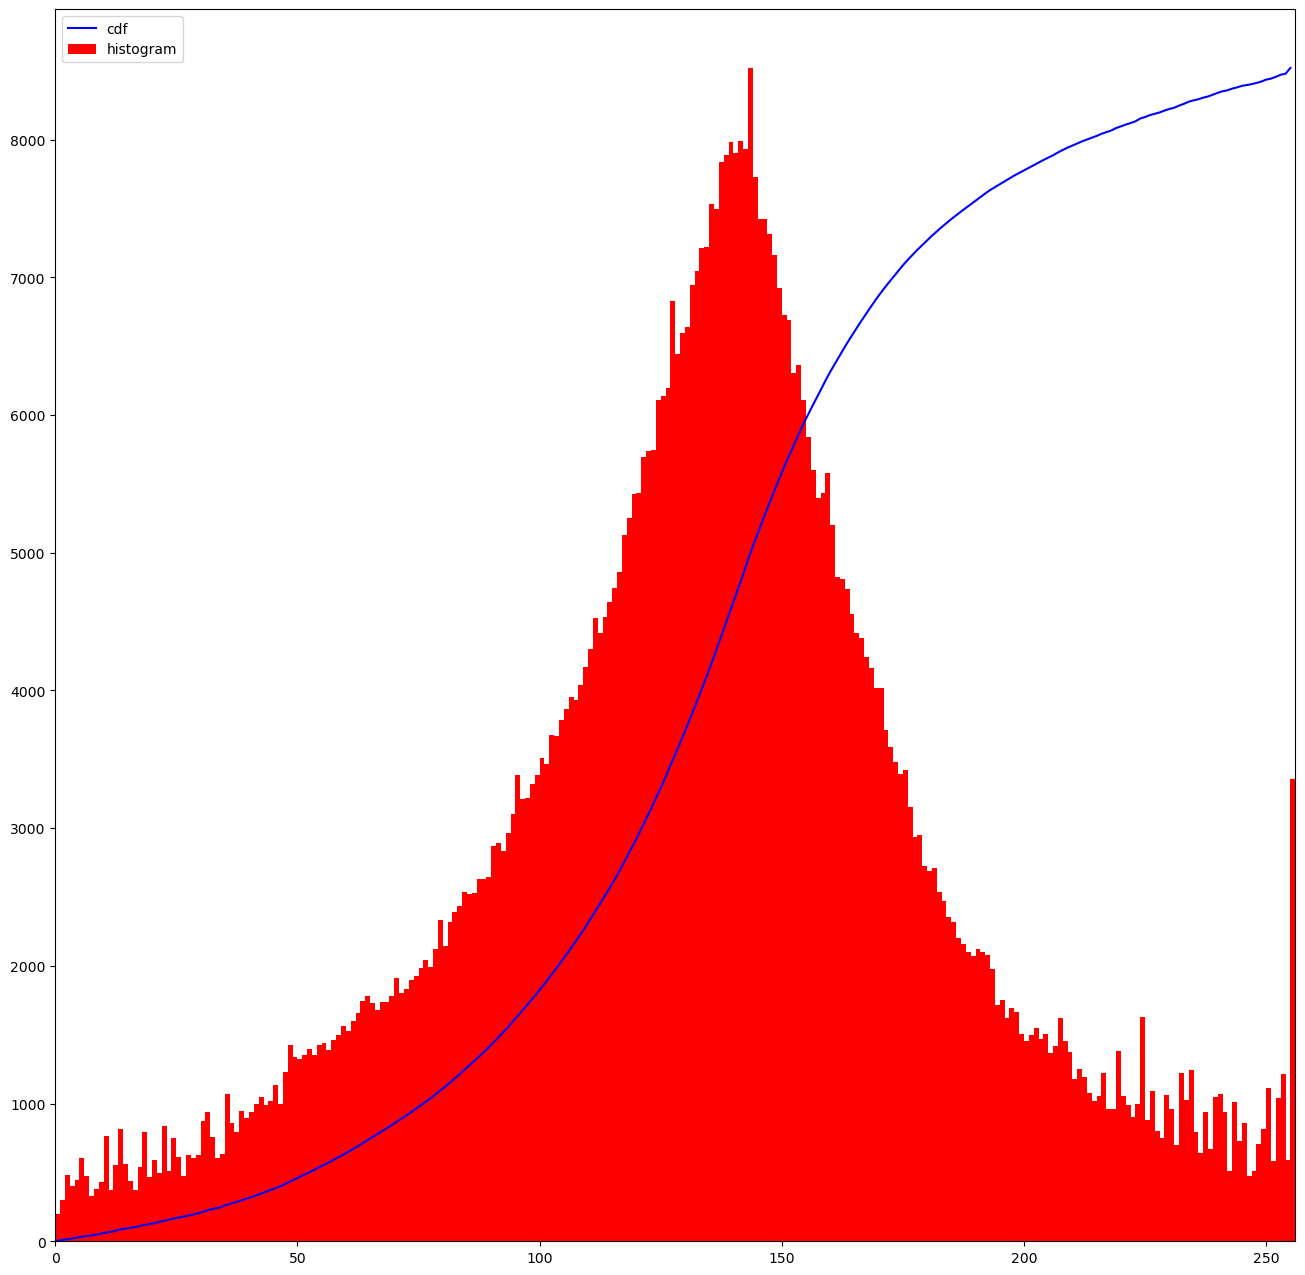

In [18]:
hist,bins = np.histogram(img_local.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_local.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Comments:

Globally equalized image: The histogram is mostly flat, indicating that the pixel intensities are spread out more evenly across the range of values. This is the result of applying histogram equalization to the original image, which helps to improve contrast and make the details in the image more visible.

Locally equalized image: The histogram shows that the pixel intensities are more evenly distributed than in the original low contrast image, but not as evenly distributed as in the globally equalized image. This is because local equalization only operates on small regions of the image at a time, rather than the whole image, so it can't completely eliminate the unevenness in the histogram. However, it does help to improve the contrast in the image and make more of the details visible.



## Constractive Limit Adaptive Equalization CLAHE

Contrast Limited Adaptive Histogram Equalization (CLAHE) is a variant of AHE that helps prevent over-amplification of noise in regions of the image that have high contrast. In CLAHE, the image is divided into small regions called tiles, and histogram equalization is applied to each tile separately. However, unlike AHE, CLAHE also applies a contrast limiting step to each tile, which limits the amplification of pixel values within each tile. This helps prevent over-amplification of noise in high-contrast regions, which can result in unnatural-looking images. The contrast limiting step is typically performed by clipping the histogram of each tile at a predefined threshold value, and redistributing the clipped pixel values evenly across the histogram.

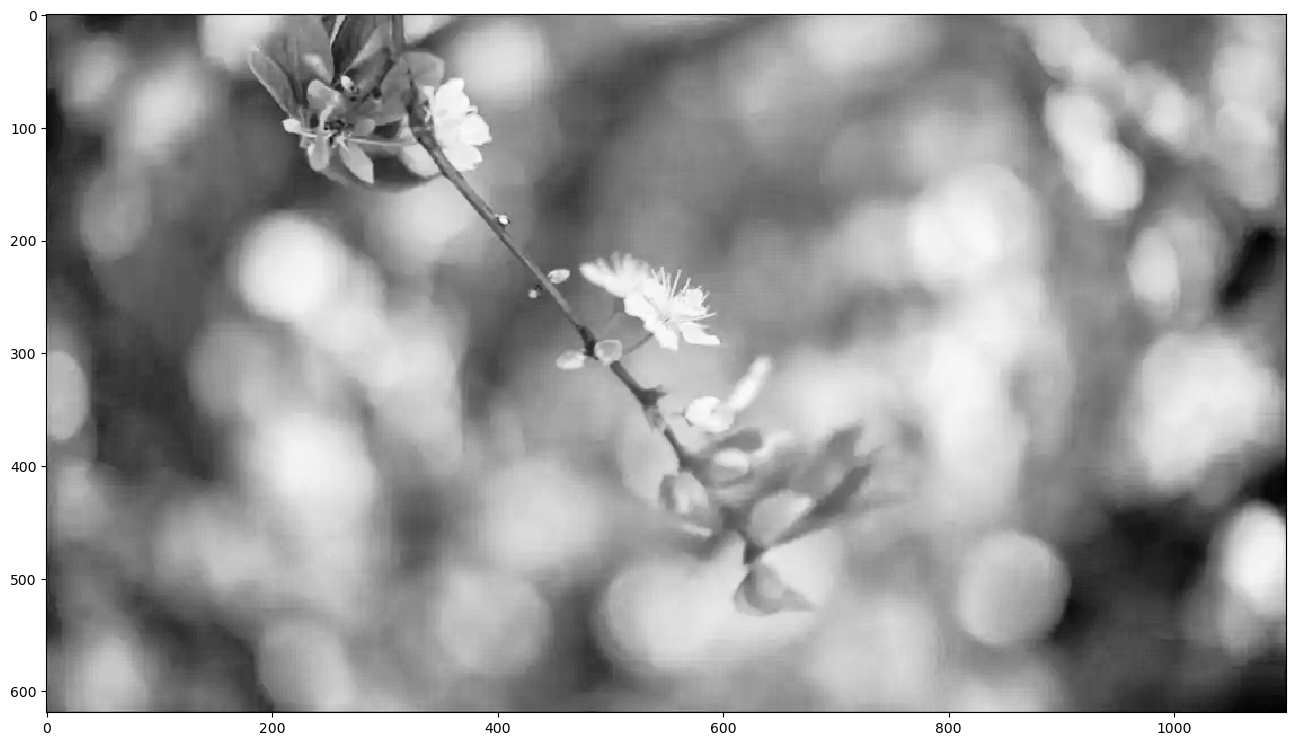

In [19]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('tsukuba_l.png',0)
path = "flower.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)
#cv.imwrite('clahe_2.jpg',cl1)
plt.imshow(cl1, cmap="Greys_r")
plt.show()

Comments:

In this cell, the CLAHE function from the OpenCV library is used to apply contrast enhancement to the grayscale version of the input image. The clipLimit parameter limits the contrast enhancement in each region to avoid over-amplification of noise, and the tileGridSize parameter specifies the size of each region.

The resulting output image shows that the contrast enhancement is more localized compared to global and local histogram equalization. The image has more details and clearer edges, especially in the areas with uneven illumination. The CLAHE technique is considered better than standard AHE as it prevents over-enhancement of noise in local regions while preserving more image details.

## Conclusion

In this lab, we learned how to perform histogram equalization on images using OpenCV and scikit-image. We also learned how to apply adaptive histogram equalization to improve the contrast of images with uneven illumination. We also learned how to apply CLAHE to improve the contrast of images with uneven illumination.